In [23]:
%reset -f

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import make_blobs, make_classification
from sklearn import datasets

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import hdbscan

from sklearn.metrics import silhouette_score, silhouette_samples

## Generate and Plot the Data

In [24]:
centers_neat = [(-10, 10), (0, -5), (10, 5)]

x_neat, _ = make_blobs(n_samples=5000, centers=centers_neat, cluster_std=2, random_state=2)

x_messy, _ = make_classification(n_samples=5000, n_classes=3, random_state=49, n_clusters_per_class=1, class_sep=1.3, shuffle=False)

km_neat = KMeans(n_clusters=3, random_state=2).fit_predict(x_neat)
km_messy = KMeans(n_clusters=3, random_state=2).fit_predict(x_messy)

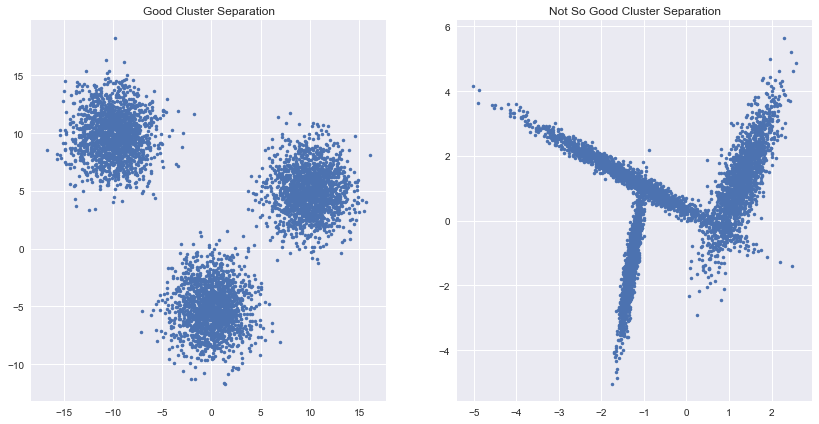

In [25]:
plt.style.use('seaborn')
cmap = 'tab10'

plt.figure(figsize=(14,7))
plt.subplot(121, title='Good Cluster Separation')
plt.plot(x_neat[:,0], x_neat[:,1], '.')
plt.subplot(122, title='Not So Good Cluster Separation')
plt.plot(x_messy[:,0], x_messy[:,1], '.')
plt.show()

## Illustrate Ineffecient Clustering of Messy Data by K-Means

In [26]:
km_neat = KMeans(n_clusters=3, random_state=2).fit_predict(x_neat)
km_messy = KMeans(n_clusters=3, random_state=2).fit_predict(x_messy)

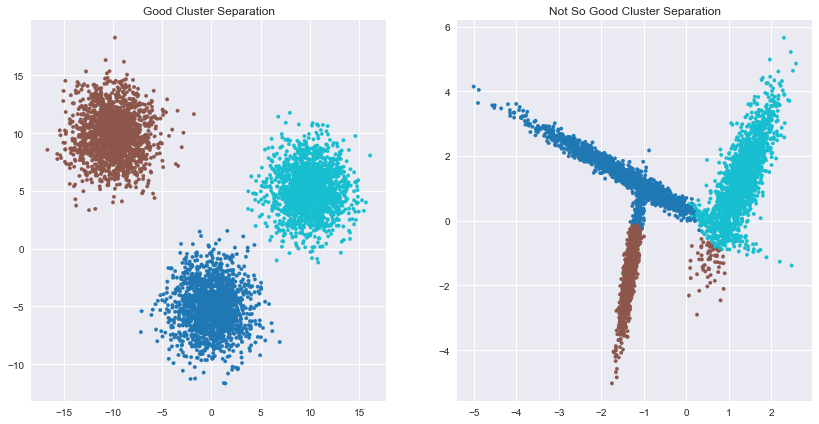

In [27]:
plt.figure(figsize=(14,7))
plt.subplot(121, title='Good Cluster Separation')
plt.scatter(x_neat[:,0], x_neat[:,1], c=km_neat, cmap=cmap, marker='.')
plt.subplot(122, title='Not So Good Cluster Separation')
plt.scatter(x_messy[:,0], x_messy[:,1], c=km_messy, cmap=cmap, marker='.')
plt.show()

## Illustrate Improved Clustering by Gaussian Mixture Model

In [28]:
gmModel = GaussianMixture(n_components=3)
gm_neat = gmModel.fit(x_neat).predict(x_neat)
gm_messy = gmModel.fit(x_messy).predict(x_messy)

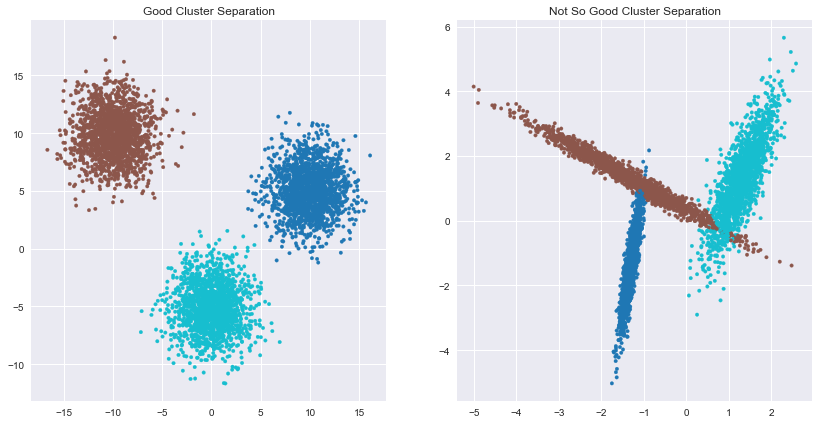

In [29]:
plt.figure(figsize=(14,7))
plt.subplot(121, title='Good Cluster Separation')
plt.scatter(x_neat[:,0], x_neat[:,1], c=gm_neat, cmap=cmap, marker='.')
plt.subplot(122, title='Not So Good Cluster Separation')
plt.scatter(x_messy[:,0], x_messy[:,1], c=gm_messy, cmap=cmap, marker='.')
plt.show()

### What happens with imbalanced datasets ?
The previous example had datasets that were decently balanced among the clusters. What if the datasets were severely imbalanced ? Or to ask a more direct question, how does one differentiate noise from good data ?
# .
## HDBSCAN
#### Pros:
Does not require the number of clusters to be set a priori and allows for noisy data.

#### Cons:
Relies on the density of data points so sparse data sets may not work well and may lose efficiency on higher dimensional data sets.

#### Links
https://en.wikipedia.org/wiki/DBSCAN

https://pypi.python.org/pypi/hdbscan



In [30]:
#Toy data set
blob1, y1 = datasets.make_blobs(n_samples=25,
                               centers=[(10,5)],
                               cluster_std=1.5,
                               random_state=2)

blob2, y2 = datasets.make_blobs(n_samples=500,
                               centers=[(6,2)],
                               cluster_std=1.3,
                               random_state=2)

blob3, y3 = datasets.make_blobs(n_samples=500,
                               centers=[(2,5)],
                               cluster_std=1,
                               random_state=2)

unbal = np.vstack([blob1, blob2, blob3])
y1[y1 == 0] = 0
y2[y2 == 0] = 1
y3[y3 == 0] = 2
labs = np.concatenate([y1, y2, y3])

In [31]:
#Predict K-Means cluster membership
km_unbal = KMeans(n_clusters=3, random_state=2).fit(unbal)
km_unbal_preds = KMeans(n_clusters=3, random_state=2).fit_predict(unbal)

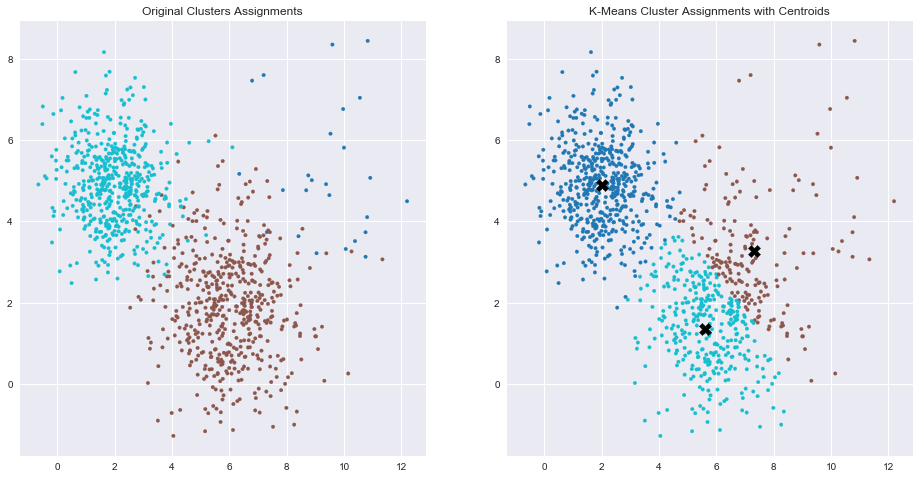

In [37]:
plt.figure(figsize=(16,8))
plt.subplot(121, title='Original Clusters Assignments')
plt.scatter(unbal[:,0], unbal[:,1], c=labs, cmap=cmap, marker='.')
plt.subplot(122, title='K-Means Cluster Assignments with Centroids')
plt.scatter(unbal[:,0], unbal[:,1], c=km_unbal_preds, cmap=cmap, marker='.')
plt.scatter(km_unbal.cluster_centers_[:,0], km_unbal.cluster_centers_[:,1], marker='X', s=150, c='black')
plt.show()

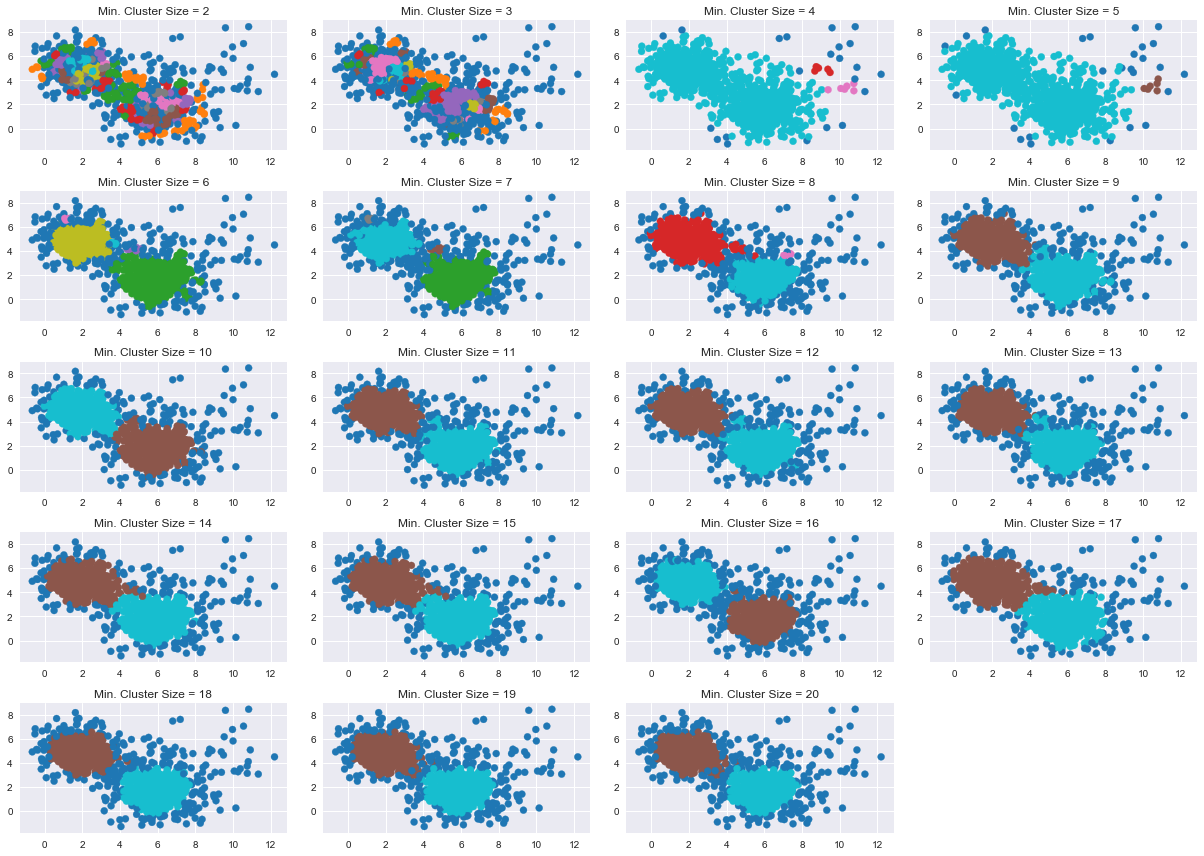

In [38]:
clust_count = np.linspace(1, 20, num=20, dtype='int')

clust_number = 2
plot_number = 1
plt.figure (figsize=(17,12))
while clust_number < 21:
    hdb = hdbscan.HDBSCAN(min_cluster_size=clust_number)
    hdb_pred = hdb.fit(unbal)
    plt.subplot(5, 4, plot_number, title = 'Min. Cluster Size = {}'.format(clust_number))
    plt.scatter(unbal[:,0], unbal[:,1], c=hdb_pred.labels_, cmap=cmap)
    plot_number += 1
    clust_number += 1

plt.tight_layout()